<a href="https://colab.research.google.com/github/MasterGino7/machine-learning-zoomcamp2025-homework/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
pip install wget

In [67]:
import wget

In [68]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

'car_fuel_efficiency (1).csv'

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv("car_fuel_efficiency.csv")

Preparing the dataset (EDA)

In [71]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [72]:
df.describe(include='all')

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9704,9704,9704,9202.000000,9704.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Gasoline,All-wheel drive,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3254,4898,4876,NaN,NaN
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,NaN,NaN,NaN,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,NaN,NaN,NaN,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,NaN,NaN,NaN,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,NaN,NaN,NaN,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,NaN,NaN,NaN,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,NaN,NaN,NaN,1.000000,16.707965


In [73]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [74]:
df.describe(include='all')

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [75]:
df.shape

(9704, 5)

In [76]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [77]:
df['horsepower'].median()

149.0

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

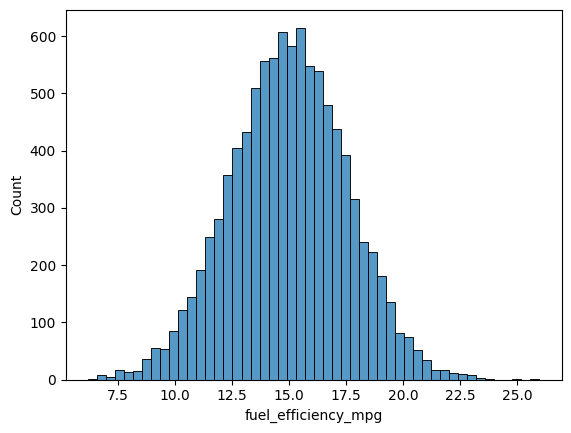

In [78]:
sns.histplot(df.fuel_efficiency_mpg,bins=50)

In [95]:
  print(df['model_year'].unique())
  print(df['model_year'].nunique())

[2003 2007 2018 2009 2008 2012 2020 2016 2005 2014 2010 2000 2006 2013
 2011 2004 2002 2022 2017 2001 2023 2019 2015 2021]
24


In [79]:
n = len(df)

n_val= int(n*0.2)
n_test=int(n*0.2)
n_train = n - n_val - n_test

In [80]:
n, n_val + n_test + n_train

(9704, 9704)

In [81]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [82]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [83]:
df_train = df.iloc[idx[:n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

Linear Regression with no regularization and 0 on NA (horsepower)

Defining linear regression model

In [84]:
def dot(xi,w):
  n = len(xi)

  res = 0.0

  for j in range(n):
    res = res + xi[j]*w[j]

  return res

In [85]:
def linear_regression(X):
    return X.dot(w_new)

In [86]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [87]:
def rmse(y,y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [88]:
dfhp0 = df_train.fillna(0)

In [89]:
X_train = dfhp0[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']

In [90]:
X_train = X_train
w0, w = train_linear_regression(X_train, y_train)

X_val = df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5173782638844466)

In [91]:
dfhpmeanvalue = df_train['horsepower'].mean()

In [92]:
X_train = df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(dfhpmeanvalue).values
w0, w = train_linear_regression(X_train, y_train)
X_val = df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(dfhpmeanvalue).values
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)


np.float64(0.4635965042334585)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

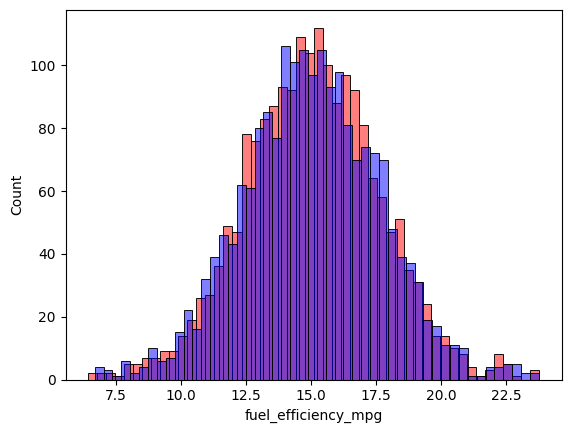

In [93]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color = 'blue', alpha=0.5, bins=50)

In [96]:
def train_linear_regression_reg(X,y,r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [97]:
for r in [0.0,0.01,0.1,1,5,10,100]:

  X_train = dfhp0[['engine_displacement','horsepower','vehicle_weight','model_year']].values
  w0, w = train_linear_regression_reg(X_train, y_train,r)

  X_val = df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val,y_pred).round(2)

  print(r,w0,score)

0.0 28.82736547365895 0.52
0.01 24.92683841981215 0.52
0.1 11.239661084581073 0.52
1 1.7315979411219746 0.52
5 0.3638075020482907 0.52
10 0.18306246621686947 0.52
100 0.01841801730688404 0.52


In [131]:
values = []
for s in (range(9)):
  n = len(df)
  n_val= int(n*0.2)
  n_test=int(n*0.2)
  n_train = n - n_val - n_test

  idx = np.arange(n)
  np.random.seed(s)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train:]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]
  y_train = df_train['fuel_efficiency_mpg']
  y_val = df_val['fuel_efficiency_mpg']

  X_train = df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
  w0, w = train_linear_regression(X_train, y_train)

  X_val = df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
  y_pred = w0 + X_val.dot(w)

  values.append(rmse(y_val,y_pred))

In [137]:
values

[np.float64(0.5206531296294218),
 np.float64(0.521338891285577),
 np.float64(0.5228069974803171),
 np.float64(0.515951674119676),
 np.float64(0.5109129460053851),
 np.float64(0.52834064601107),
 np.float64(0.5313910658146311),
 np.float64(0.5090670387381733),
 np.float64(0.5147399129511132)]

In [139]:
values = np.array(values)

In [142]:
round(values.std(),3)

np.float64(0.007)

In [143]:
n = len(df)
n_val= int(n*0.2)
n_test=int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train,y_val])

X_train = df_full_train[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
w0, w = train_linear_regression(X_train, y_full_train)

X_test = df_test[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0).values
y_pred = w0 + X_test.dot(w)

rmse(y_test,y_pred)



np.float64(0.5156132022024005)